In [213]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, cross_val_score


In [214]:
my_name="Patricia"
print(my_name)

Patricia


In [215]:
red_wine=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')

# Checking the data red wine

In [216]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Standardisation name of labels red wine

In [217]:
red_wine_named=red_wine.rename(columns={'fixed acidity': 'fixed_acidity_g/dm3','volatile acidity': 'volatile_acidity_g/dm3', 'citric acid': 'citric_acid_g/dm3', 'residual sugar': 'residual_sugar', 'chlorides': 'chlorides_g/dm3','free sulfur dioxide':'free_sulfur_dioxide_mg/dm3','total sulfur dioxide':'total_sulfur_dioxide_mg/dm3', 'density':'density_g/cm3','sulphates':'sulphates_g/dm3', 'alcohol': 'alcohol_%'}, inplace=True)

In [218]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fixed_acidity_g/dm3          1599 non-null   float64
 1   volatile_acidity_g/dm3       1599 non-null   float64
 2   citric_acid_g/dm3            1599 non-null   float64
 3   residual_sugar               1599 non-null   float64
 4   chlorides_g/dm3              1599 non-null   float64
 5   free_sulfur_dioxide_mg/dm3   1599 non-null   float64
 6   total_sulfur_dioxide_mg/dm3  1599 non-null   float64
 7   density_g/cm3                1599 non-null   float64
 8   pH                           1599 non-null   float64
 9   sulphates_g/dm3              1599 non-null   float64
 10  alcohol_%                    1599 non-null   float64
 11  quality                      1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Initial visual analysis

c:\Users\patri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\patri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\patri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\patri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

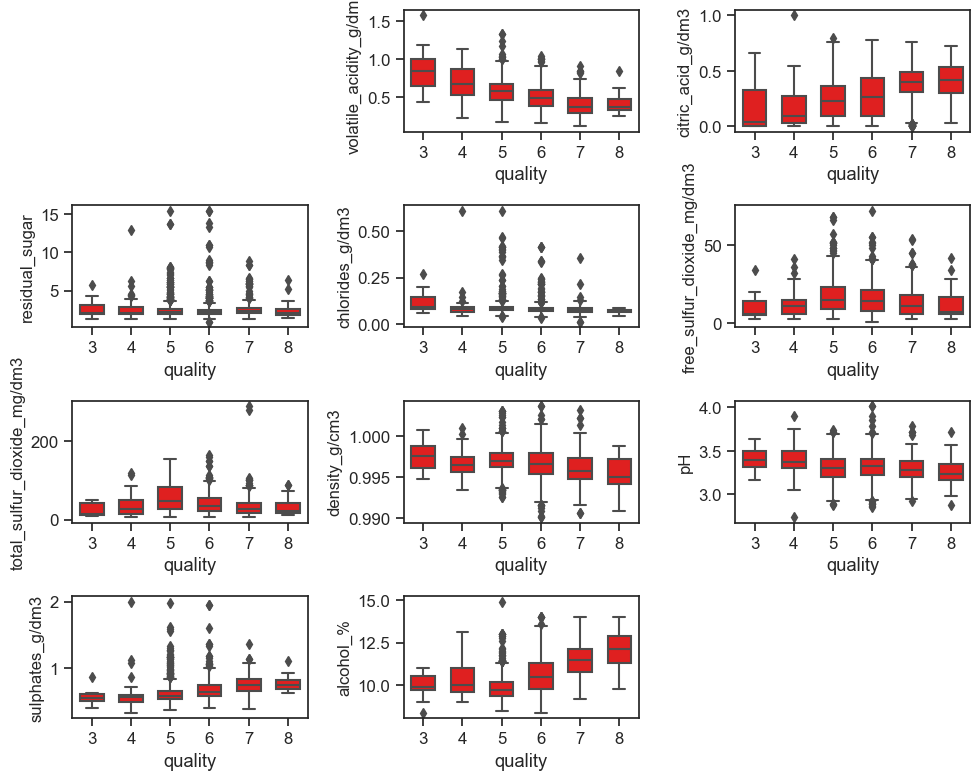

In [219]:
sns.set_style('ticks')
sns.set_context("notebook", font_scale= 1.1)
colnm = red_wine.columns.to_list()


plt.figure(figsize = (10, 8))

for i in range(1,11):
    plt.subplot(4,3,i+1)
    sns.boxplot(x ='quality', y = colnm[i], data = red_wine, color = "red", width = 0.6)    
    plt.ylabel(colnm[i],fontsize = 12)
plt.tight_layout()
print()

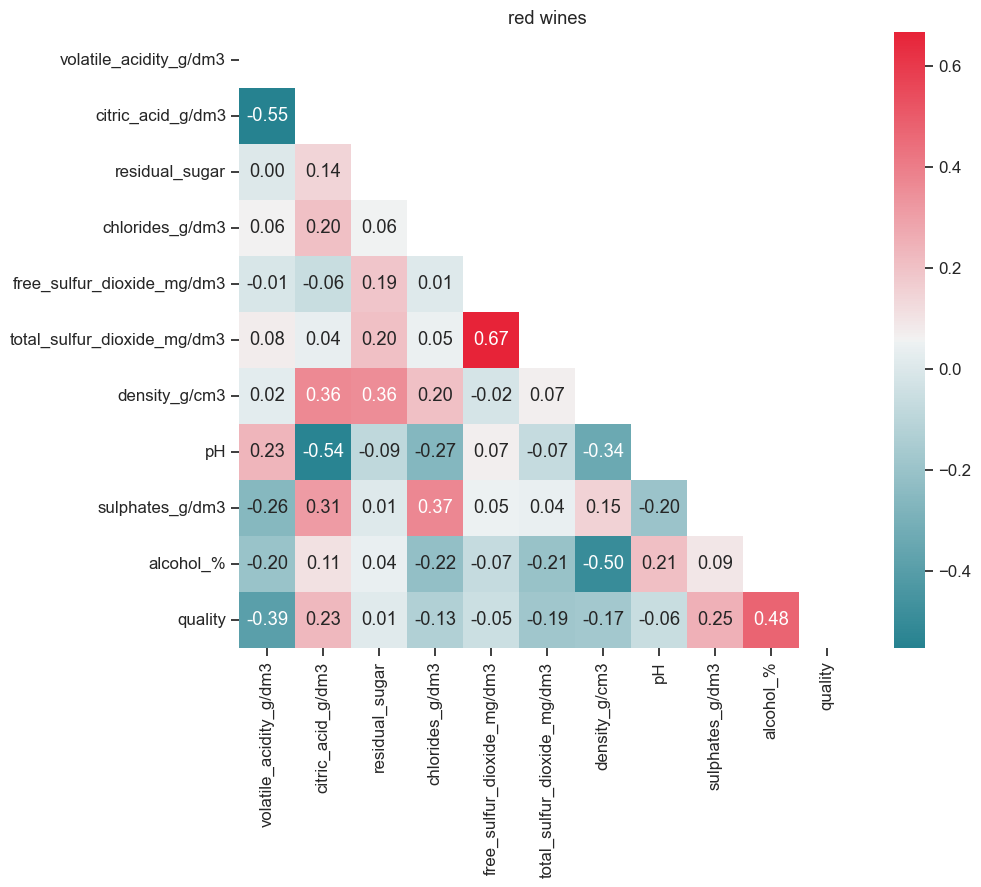

In [220]:
plt.figure(figsize=(10, 8))

colnm = red_wine.columns.to_list()[1:13]
mcorr = red_wine[colnm].corr()
mask = np.zeros_like(mcorr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(210, 10, s=90, as_cmap=True)
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')
plt.title("red wines")
plt.show()

In [221]:
red_duplicate = red_wine[red_wine.duplicated()]

print(red_duplicate)

      fixed_acidity_g/dm3  volatile_acidity_g/dm3  citric_acid_g/dm3  \
4                     7.4                   0.700               0.00   
11                    7.5                   0.500               0.36   
27                    7.9                   0.430               0.21   
40                    7.3                   0.450               0.36   
65                    7.2                   0.725               0.05   
...                   ...                     ...                ...   
1563                  7.2                   0.695               0.13   
1564                  7.2                   0.695               0.13   
1567                  7.2                   0.695               0.13   
1581                  6.2                   0.560               0.09   
1596                  6.3                   0.510               0.13   

      residual_sugar  chlorides_g/dm3  free_sulfur_dioxide_mg/dm3  \
4               1.90            0.076                        11.0 

In [222]:
red_wine.drop_duplicates(inplace=True)
print(red_wine)

      fixed_acidity_g/dm3  volatile_acidity_g/dm3  citric_acid_g/dm3  \
0                     7.4                   0.700               0.00   
1                     7.8                   0.880               0.00   
2                     7.8                   0.760               0.04   
3                    11.2                   0.280               0.56   
5                     7.4                   0.660               0.00   
...                   ...                     ...                ...   
1593                  6.8                   0.620               0.08   
1594                  6.2                   0.600               0.08   
1595                  5.9                   0.550               0.10   
1597                  5.9                   0.645               0.12   
1598                  6.0                   0.310               0.47   

      residual_sugar  chlorides_g/dm3  free_sulfur_dioxide_mg/dm3  \
0                1.9            0.076                        11.0 

In [223]:
red_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity_g/dm3,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile_acidity_g/dm3,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric_acid_g/dm3,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual_sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides_g/dm3,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free_sulfur_dioxide_mg/dm3,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total_sulfur_dioxide_mg/dm3,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density_g/cm3,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates_g/dm3,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


In [224]:
red_wine.drop(['residual_sugar', 'pH', 'free_sulfur_dioxide_mg/dm3'], axis=1)

,fixed_acidity_g/dm3,volatile_acidity_g/dm3,citric_acid_g/dm3,chlorides_g/dm3,total_sulfur_dioxide_mg/dm3,density_g/cm3,sulphates_g/dm3,alcohol_%,quality
0,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,5
1,7.8,0.880,0.00,0.098,67.0,0.99680,0.68,9.8,5
2,7.8,0.760,0.04,0.092,54.0,0.99700,0.65,9.8,5
3,11.2,0.280,0.56,0.075,60.0,0.99800,0.58,9.8,6
5,7.4,0.660,0.00,0.075,40.0,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,0.068,38.0,0.99651,0.82,9.5,6
1594,6.2,0.600,0.08,0.090,44.0,0.99490,0.58,10.5,5
1595,5.9,0.550,0.10,0.062,51.0,0.99512,0.76,11.2,6
1597,5.9,0.645,0.12,0.075,44.0,0.99547,0.71,10.2,5


In [225]:
red_wine.reset_index(inplace=True)

In [226]:
red_wine['quality'] = red_wine['quality'].apply(lambda value: '0'
if value <= 5 else '1'
if value <= 7 else '2')

# Changed the values in quality feature

In [227]:
red_wine.head()

,index,fixed_acidity_g/dm3,volatile_acidity_g/dm3,citric_acid_g/dm3,residual_sugar,chlorides_g/dm3,free_sulfur_dioxide_mg/dm3,total_sulfur_dioxide_mg/dm3,density_g/cm3,pH,sulphates_g/dm3,alcohol_%,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [228]:
x=red_wine[red_wine.columns[:-1]]
y=red_wine['quality']
sc=StandardScaler()
x=sc.fit_transform(x)

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=.2, random_state=42)

# created a new dataframe with all columns except quality. Selected quality as target (=y)
# Standardized the features getting a new x with standard values given all values mean 0 and standard deviation 1 making them comparable



In [229]:
for data in [y_train, y_test]:
    print(data.describe())
    
# Checked the content of y_train and y_test

count     1087
unique       3
top          1
freq       568
Name: quality, dtype: object
count     272
unique      3
top         0
freq      135
Name: quality, dtype: object


# K Nearest Neighbors Classifier

In [230]:
n3=KNeighborsClassifier(n_neighbors=3) # 3 Neighbors considered to make the prediction
n3.fit(x_train,y_train)
pred_n3=n3.predict(x_test) # generates the predictions
print (classification_report(y_test, pred_n3)) # compare the prediction with the true features
cross_val=cross_val_score(estimator=n3, X=x_train, y=y_train, cv=10) # to perfom cross validation
print(cross_val.mean()) # prints the result



              precision    recall  f1-score   support

           0       0.69      0.64      0.66       135
           1       0.65      0.69      0.67       134
           2       0.00      0.00      0.00         3

    accuracy                           0.66       272
   macro avg       0.44      0.45      0.44       272
weighted avg       0.66      0.66      0.66       272

0.6798250084947333


In [231]:
print("Confusion matrix KN:")
print(confusion_matrix(y_test, pred_n3))

Confusion matrix KN:
[[87 48  0]
 [40 93  1]
 [ 0  3  0]]


In [232]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(x_train, y_train)
print(f"Shape of X_train_oversampled: {X_train_oversampled.shape}")
print(f"Shape of y_train_oversampled: {y_train_oversampled.shape}")


Shape of X_train_oversampled: (1704, 12)
Shape of y_train_oversampled: (1704,)


# K Nearest Neighbors Classifier oversampling

In [233]:
n3=KNeighborsClassifier(n_neighbors=3) # 3 Neighbors considered to make the prediction
n3.fit(X_train_oversampled,y_train_oversampled)
pred_n3=n3.predict(x_test) # generates the predictions
print (classification_report(y_test, pred_n3)) # compare the prediction with the true features
cross_val=cross_val_score(estimator=n3, X=X_train_oversampled, y=y_train_oversampled, cv=10) # to perfom cross validation
print(cross_val.mean()) # prints the result

              precision    recall  f1-score   support

           0       0.69      0.64      0.66       135
           1       0.61      0.58      0.60       134
           2       0.06      0.33      0.10         3

    accuracy                           0.61       272
   macro avg       0.45      0.52      0.45       272
weighted avg       0.64      0.61      0.63       272

0.7564499484004128


<Axes: >

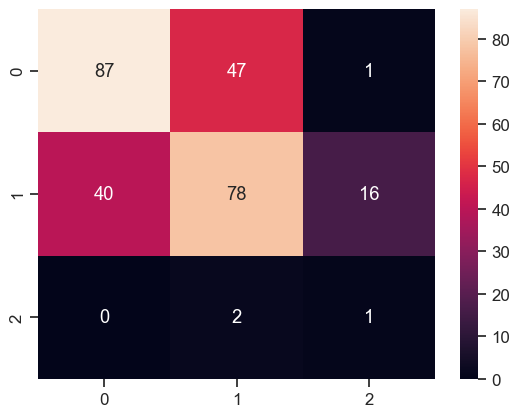

In [234]:
cmkn = confusion_matrix(y_test, pred_n3)
sns.heatmap(cmkn, annot = True, fmt='g')

# TP= 87, FP= 48, FN= 40, TN= 93 Accuracy = (TP + TN) / Total Instances= 0.66

# not sure if it was good idea to drop the duplicates

# Random Forest Classifier

In [235]:
rf= RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf=rf.predict(x_test)
print(classification_report(y_test, pred_rf))
cross_val=cross_val_score(estimator=rf, X=x_train, y=y_train, cv=3)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       135
           1       0.74      0.80      0.77       134
           2       0.00      0.00      0.00         3

    accuracy                           0.76       272
   macro avg       0.51      0.51      0.51       272
weighted avg       0.76      0.76      0.76       272

0.7184857109518084


# Random Forest Classifier oversampling

In [236]:
rf= RandomForestClassifier()
rf.fit(X_train_oversampled,y_train_oversampled)
pred_rf=rf.predict(x_test)
print(classification_report(y_test, pred_rf))
cross_val=cross_val_score(estimator=rf, X=X_train_oversampled, y=y_train_oversampled, cv=3)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.79      0.76      0.77       135
           1       0.74      0.76      0.75       134
           2       0.17      0.33      0.22         3

    accuracy                           0.75       272
   macro avg       0.57      0.62      0.58       272
weighted avg       0.76      0.75      0.76       272

0.8075117370892019


In [237]:
print("Confusion matrix rf:")
print(confusion_matrix(y_test, pred_rf))


Confusion matrix rf:
[[102  33   0]
 [ 27 102   5]
 [  0   2   1]]


<Axes: >

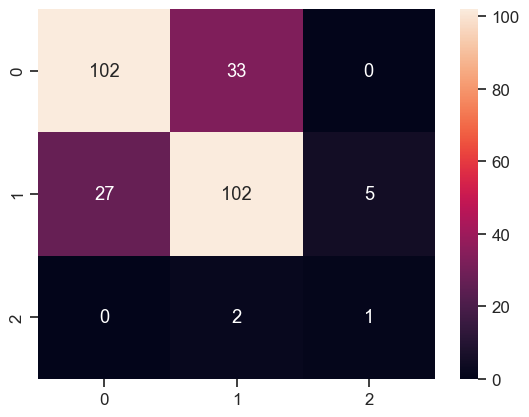

In [238]:
cm = confusion_matrix(y_test, pred_rf)
cm
sns.heatmap(cm, annot = True, fmt='g')

# TP: 98, FP = 37, FN = 23, TN = 110, Accuracy = (TP + TN) / Total Instances=0.78


# Decision Tree Classifier

In [239]:
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
pred_dt=dt.predict(x_test)
print(classification_report(y_test, pred_dt))
cross_val=cross_val_score(estimator=dt,X=x_train, y=y_train, cv=2)
print(cross_val.mean())


              precision    recall  f1-score   support

           0       0.69      0.72      0.71       135
           1       0.68      0.64      0.66       134
           2       0.00      0.00      0.00         3

    accuracy                           0.67       272
   macro avg       0.46      0.45      0.45       272
weighted avg       0.68      0.67      0.67       272

0.6577446240927309


In [240]:
print("Confusion matrix dt:")
print(confusion_matrix(y_test, pred_dt))

Confusion matrix dt:
[[97 38  0]
 [43 86  5]
 [ 0  3  0]]


<Axes: >

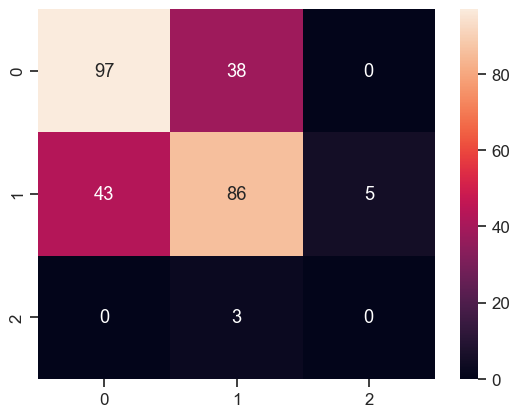

In [241]:
cmdt = confusion_matrix(y_test, pred_dt)
sns.heatmap(cmdt, annot = True, fmt='g')

# TP = 97, FP = 38, FN = 46, TN = 82, Accuracy = 0.69

# Logistic Regression

In [242]:
# import LogisticRegression Model
from sklearn.linear_model import LogisticRegression

# LogisticRegression model
lr= LogisticRegression(random_state= 42)
lr.fit(x_train, y_train)
pred_lr = lr.predict(x_test)


In [243]:
print(classification_report(y_test, pred_lr))
cross_val=cross_val_score(estimator=lr,X=x_train, y=y_train, cv=6)
print(cross_val.mean())

c:\Users\patri\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\patri\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\patri\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.77      0.74      0.75       135
           1       0.73      0.78      0.75       134
           2       0.00      0.00      0.00         3

    accuracy                           0.75       272
   macro avg       0.50      0.51      0.50       272
weighted avg       0.74      0.75      0.75       272

0.7203063971019773


# Logistic Regression oversampling 

In [244]:
lr= LogisticRegression(random_state= 42)
lr.fit(X_train_oversampled, y_train_oversampled)
pred_lr = lr.predict(x_test)
print(classification_report(y_test, pred_lr))
cross_val=cross_val_score(estimator=lr,X=X_train_oversampled, y=y_train_oversampled, cv=6)
print(cross_val.mean())


              precision    recall  f1-score   support

           0       0.76      0.79      0.77       135
           1       0.73      0.57      0.64       134
           2       0.07      0.67      0.13         3

    accuracy                           0.68       272
   macro avg       0.52      0.68      0.52       272
weighted avg       0.74      0.68      0.70       272

0.7447183098591549


In [245]:
print("Confusion matrix lr:")
print(confusion_matrix(y_test, pred_lr))

Confusion matrix lr:
[[106  27   2]
 [ 33  77  24]
 [  0   1   2]]


<Axes: >

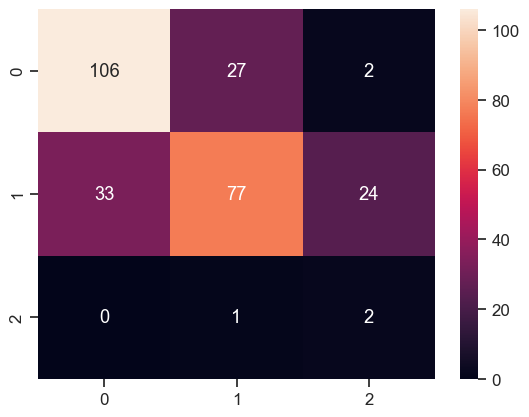

In [246]:
cmlr = confusion_matrix(y_test, pred_lr)
sns.heatmap(cmlr, annot = True, fmt='g')

# TP = 100, FP = 35, FN = 30, TN = 104, Accuracy = 0.76